In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_dir = '/kaggle/input/cats-and-dogs-image-classification/test'
test_dir = '/kaggle/input/cats-and-dogs-image-classification/train'

In [3]:
trainDatagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = trainDatagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    verbose=2
)

Epoch 1/10
5/5 - 17s - loss: 1.7817 - accuracy: 0.5000 - val_loss: 0.7629 - val_accuracy: 0.4991 - 17s/epoch - 3s/step
Epoch 2/10
5/5 - 9s - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6990 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 3/10
5/5 - 9s - loss: 0.7039 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 4/10
5/5 - 9s - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 5/10
5/5 - 9s - loss: 0.6910 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 6/10
5/5 - 9s - loss: 0.6857 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 7/10
5/5 - 9s - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6860 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 8/10
5/5 - 9s - loss: 0.6741 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.4991 - 9s/epoch - 2s/step
Epoch 9/10
5/5 - 9s - loss: 0.6801 - accuracy: 0.5000 - val_lo

In [8]:
# Print accuracy on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f"Test Accuracy: {(test_accuracy*1):.2f}%")

# Predict an image from the test data
test_image = test_generator[0][0][0]  # Take the first image from the first batch
prediction = model.predict(tf.expand_dims(test_image, axis=0))
predicted_class = "cat" if prediction[0][0] < 0.5 else "dog"
print(f"Predicted class: {predicted_class}")

18/18 - 6s - loss: 0.6882 - accuracy: 0.4991 - 6s/epoch - 314ms/step
Test Accuracy: 0.50%
1/1 [==============================] - 0s 165ms/step
Predicted class: dog


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the image
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                          100*np.max(predictions_array),
                                          true_label),
               color=color)

# Function to plot the array values
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# Verify predictions for an image
def verify_prediction(i, predictions, true_labels, images):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], true_labels, images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], true_labels)
    plt.show()


# Use the trained model to make predictions on a single image
def predict_single_image(image, model):
    img = np.expand_dims(image, 0)
    prediction = model.predict(tf.expand_dims(test_image, axis=0))
    plot_value_array(0, prediction[0],test_generator)
    _ = plt.xticks(range(2), ["cat", "dog"], rotation=45)
    predicted_class = "cat" if prediction[0][0] < 0.5 else "dog"
    return predicted_class

18/18 - 6s - loss: 0.6882 - accuracy: 0.4991 - 6s/epoch - 321ms/step

Test accuracy: 0.49910232424736023
18/18 [==============================] - 6s 304ms/step


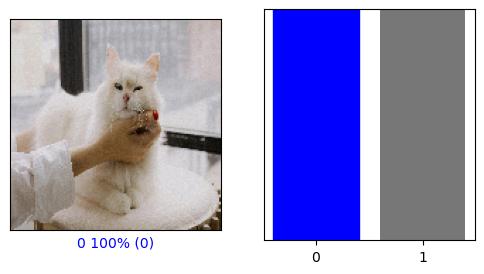

Predicted class: dog


In [10]:
# Evaluate accuracy on test dataset
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions on the test dataset
predictions = model.predict(test_generator)

# Verify predictions for the first image
verify_prediction(0, predictions, [0,1], test_generator[0][0])

# Predict a single image
test_image = test_generator[0][0][5]
predicted_class = "cat" if prediction[0][0] < 0.5 else "dog"
# predicted_class = predict_single_image(test_image, model)
print("Predicted class:", predicted_class)